In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re 
import seaborn as sns 
#print ('seaborn versiont:',sns._version_)
import os
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Loading the dataset
loan = pd.read_csv("C:/Users/adm/Documents/Datasets/loan.csv",dtype = 'object')

In [56]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


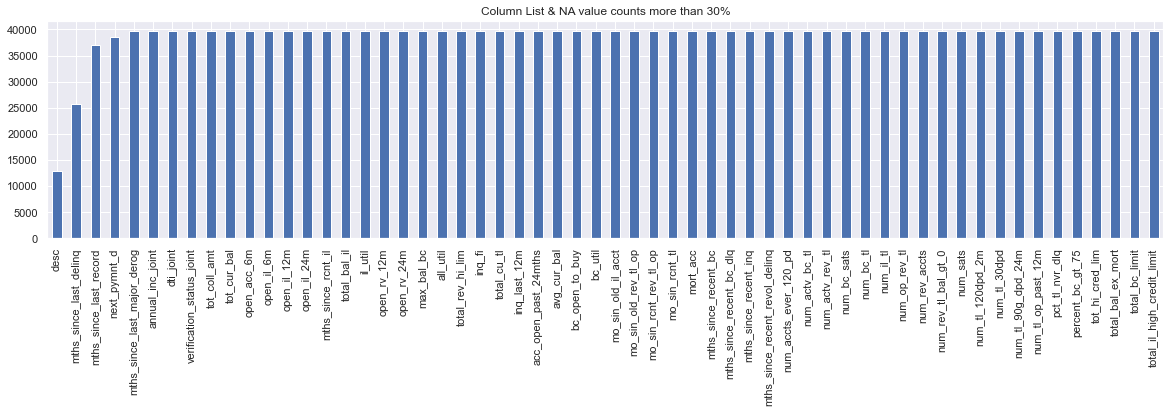

In [57]:
# Checking column list and NA value counts more than 30%
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values>(0.2*len(loan))]
plt.figure(figsize =(20,4))
NA_col.plot(kind = 'bar')
plt.title("Column List & NA value counts more than 30%")
plt.show()

In [58]:
NA_col[NA_col.values>(0.2*len(loan))]

desc                              12940
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717


In [59]:
loan.isnull().sum()/len(loan)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [60]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

From the above plot we have 20+ columns in the dataset with all values NA.
Checking for any columns with missing values more than 30% missing values and removing it.


## Data Cleaninging

In [61]:
def removeNulls(dataframe, axis =1, percent=0.3):
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("nNumber of Rows droppedt: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns droppedt: ",len(colnames))
    print("nOld dataset rows,columns",ishape,"nNew dataset rows,columns",df.shape)
    return df

 1. Remove columns where NA values are more than or equal to 30% 

In [62]:
loan = removeNulls(loan, axis =1,percent = 0.3)

Number of Columns droppedt:  58
nOld dataset rows,columns (39717, 111) nNew dataset rows,columns (39717, 53)


2. Remove any rows with NA values greater than or equal to 30%. 

In [63]:
loan =  removeNulls(loan,axis = 1,percent = 0.3)

Number of Columns droppedt:  0
nOld dataset rows,columns (39717, 53) nNew dataset rows,columns (39717, 53)


3. Remove all columns with only one unique value.` 

In [64]:
unique = loan.nunique()
unique = unique[unique.values == 1]

In [65]:
loan.drop(labels = list(unique.index),axis =1,inplace =True)
print('We are now left with', loan.shape, 'rows & columns.')

We are now left with (39717, 44) rows & columns.


4. Employment Term : Replace the value of 'na' with self employed

In [66]:
print(loan.emp_length.unique())
loan.emp_length.fillna('0',inplace = True)
loan.emp_length.replace('n/a',"Self-Employed",inplace = True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [67]:
 print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [68]:
print(loan.zip_code.unique())

['860xx' '309xx' '606xx' '917xx' '972xx' '852xx' '280xx' '900xx' '958xx'
 '774xx' '853xx' '913xx' '245xx' '951xx' '641xx' '921xx' '067xx' '890xx'
 '770xx' '335xx' '799xx' '605xx' '103xx' '150xx' '326xx' '564xx' '141xx'
 '080xx' '330xx' '974xx' '934xx' '405xx' '946xx' '445xx' '850xx' '604xx'
 '292xx' '088xx' '180xx' '029xx' '700xx' '010xx' '441xx' '104xx' '061xx'
 '616xx' '947xx' '914xx' '765xx' '980xx' '017xx' '752xx' '787xx' '077xx'
 '540xx' '225xx' '440xx' '437xx' '559xx' '912xx' '325xx' '300xx' '923xx'
 '352xx' '013xx' '146xx' '074xx' '786xx' '937xx' '331xx' '115xx' '191xx'
 '114xx' '908xx' '902xx' '992xx' '750xx' '950xx' '329xx' '226xx' '614xx'
 '802xx' '672xx' '083xx' '100xx' '926xx' '931xx' '712xx' '060xx' '707xx'
 '342xx' '895xx' '430xx' '919xx' '996xx' '891xx' '935xx' '801xx' '928xx'
 '233xx' '927xx' '970xx' '211xx' '303xx' '070xx' '194xx' '263xx' '403xx'
 '301xx' '553xx' '993xx' '312xx' '432xx' '602xx' '216xx' '151xx' '971xx'
 '305xx' '334xx' '050xx' '129xx' '925xx' '483xx' '7

5. Remove any columns that aren't relevant

In [69]:
not_required_columns = ["id","member_id","zip_code"]
loan.drop(labels = not_required_columns, axis = 1, inplace =True)
print('We are now left with', loan.shape, 'rows & columns.')

We are now left with (39717, 41) rows & columns.


6. Convert all continuous variables to numeric values

In [71]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

ValueError: Unable to parse string "10.65%" at position 0

In [72]:
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

ValueError: Unable to parse string "10.65%" at position 0

In [ ]:
# loan rate has diff issue with %

loan.int_rate.unique()

loan['int_rate']=(pd.to_numeric(loan['int_rate'].str.replace(r'%', '')))

loan.int_rate

loan['int_rate_bkp']=loan['int_rate']

7. Loan purpose: Remove records with values less than 0.75%.

In [ ]:
(loan.purpose.value_counts()*100)/len(loan)

In [ ]:
loan.purpose.value_counts()

In [ ]:
del_loan_purpose = (loan.purpose.value_counts()*100)/len(loan)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]
loan.drop(labels = loan[loan.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")
print(loan.purpose.unique())

8. Loan Status: Remove all records with a value of less than 1.5%.

In [ ]:
(loan.loan_status.value_counts()*100)/len(loan)

In [ ]:
del_loan_status = (loan.loan_status.value_counts()*100)/len(loan)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]
loan.drop(labels = loan[loan.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")
print(loan.loan_status.unique())

In [ ]:
(loan.loan_status.value_counts()*100)/len(loan)

In [ ]:
# Univatiaten Analysis
# Continous variables 
# Univariate function to plot parameter values in graphs
def univariate(df,col,vartype,hue =None):    
    '''
    Univariate function will plot parameter values in graphs.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuous or categorical
                Continuous(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : Only applicable in categorical analysis.
    '''
    sns.set(style="darkgrid")
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
    plt.show()

In [ ]:
# 1).Loan  Amount
#univariate(df = loan , col = 'loan_amnt',vartype = 0)
univariate(df=loan,col='loan_amnt',vartype=0)

In [ ]:
#2.) Interest Rates
univariate(df=loan,col='loan_amnt',vartype=0)

In [ ]:
#3.) Annual Income
loan["annual_inc"].describe()

In [ ]:
#Remove Outliers (values from 99 to 100%)
q = loan["annual_inc"].apply(lambda x: float(x)).quantile(0.995)
loan = loan[loan["annual_inc"].apply(lambda x: float(x)) < q]
loan["annual_inc"].describe()

In [ ]:
loan['annual_inc'] = loan['annual_inc'].apply(lambda x: float(x))
univariate(df=loan,col='annual_inc',vartype=0)

The majority of the loan applicants earn between 40000 to 90000 USD annually.

### Categorical Variables

4). Loan Status

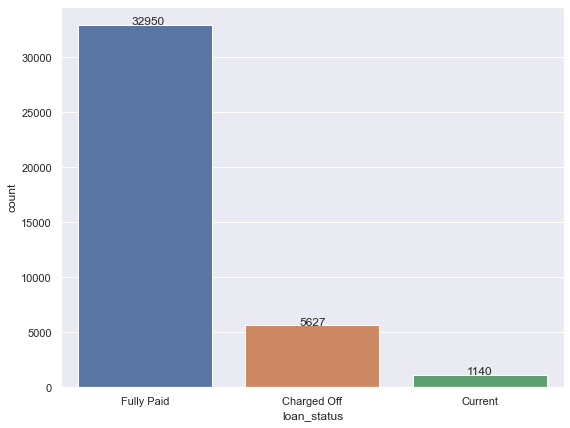

In [73]:
univariate(df=loan,col='loan_status',vartype=1)

5). Home Ownership Wise Loan

In [74]:
loan.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [75]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [77]:
# Remove rows where home_ownership’==’OTHER’, ‘NONE’, ‘ANY’
rem = ['OTHER', 'NONE', 'ANY']
loan.drop(loan[loan['home_ownership'].isin(rem)].index,inplace =True)
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

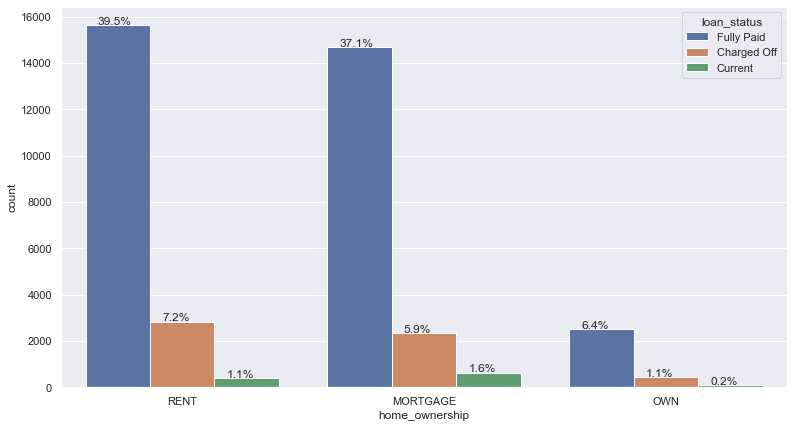

In [78]:
univariate(df=loan,col='home_ownership',vartype=1,hue='loan_status')

40% of applicants live in a rented house, whereas 52% of applicants have a mortgage on their property.

## Bi-variate/Multivariate Analysis
The association between two/two or more variables is found using bivariate/multivariate analysis. 
For every combination of categorical and continuous data, we can perform Bi-variate/Multivariate analysis. Categorical & Categorical, 
Categorical & Continuous, and Continuous & Continuous are examples of possible combinations.

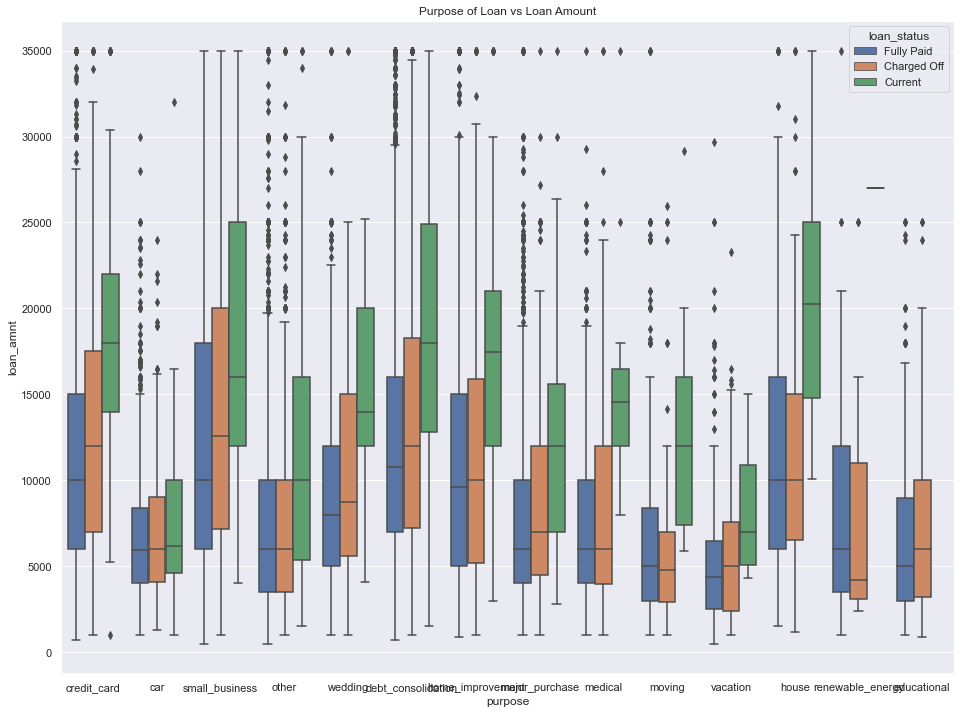

In [79]:
# Purpose of Loan / Loan Amount for loan status
plt.figure(figsize=(16,12))
loan['loan_amnt'] = loan['loan_amnt'].astype('float')
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()